In [4]:
# Import essetial modules
import csv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Import data from csv file into a pandas dataframe and check that if it is correct
df = pd.read_csv("poloniex_usdt_btc_20170101_DOHLCV_300_sma.csv", sep=';')
print(df.head())

         date        open        high         low       close       volume  \
0  1483228800  965.000001  965.000001  964.000000  964.000001  5398.837117   
1  1483229100  966.150000  966.150000  964.000002  964.000002    84.302118   
2  1483229400  964.050000  966.149988  962.028165  964.000000  2638.676171   
3  1483229700  962.028165  964.000000  961.700000  962.200001  3415.272309   
4  1483230000  964.000011  964.677377  962.769304  962.849999    80.287691   

   sma  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  


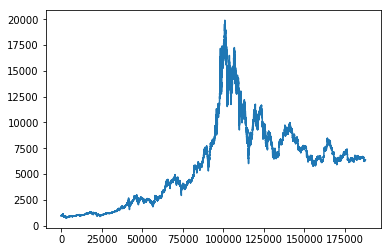

In [9]:
# Plot 'open' values
plt.plot(range(df.values.shape[0]), df.values[:, 1])
plt.show()

In [5]:
# Turn dataframe into a numpy floating point array
df_values = df.values
timestamps = df_values[:, 0]
dataset = df_values[:, 1:].astype("float")

# Ignore the first 20 row, because we are using SMA on 20 samples,
# so these incosistent values values
dataset = dataset[20:, :]


# Split the dataset into training (70%), cross validation (20%) and test (10%) set
samples_num = dataset.shape[0]

valid_split = 0.2
test_split = 0.1

dataset_train = dataset[0:int(samples_num * (1 - valid_split - test_split))]
dataset_valid = dataset[int(samples_num * (1 - valid_split - test_split)):int(samples_num * (1 - test_split))]
dataset_test = dataset[int(samples_num * (1 - test_split)):]

# Helper function for creating dataset for LSTM components
# [Description:   We want to predict the next value in time, so we have to
#                 shift the values with the 'look_back' variable]
def create_dataset_for_lstm(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

# Call the helper function for the training, cross validation and test sets,
# then format them consistently
look_back = 1
X_train, Y_train = create_dataset_for_lstm(dataset_train, look_back)
X_valid, Y_valid = create_dataset_for_lstm(dataset_valid, look_back)
X_test, Y_test = create_dataset_for_lstm(dataset_test, look_back)

X_train = X_train[:, 0, :]
X_valid = X_valid[:, 0, :]
X_test = X_test[:, 0, :]

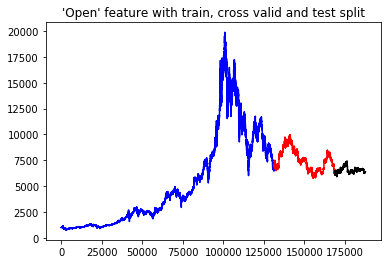

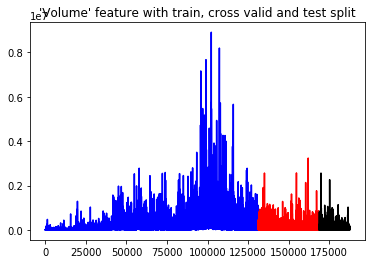

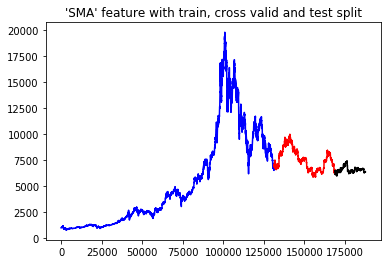

In [8]:
# Plot 'open' feature
plt.plot(dataset_train[:, 0], '-b')
plt.plot([None for i in dataset_train[:, 0]] + [x for x in dataset_valid[:, 0]], '-r')
plt.plot([None for i in dataset_train[:, 0]] + [None for x in dataset_valid[:, 0]] + [x for x in dataset_test[:, 0]], '-k')
plt.title("'Open' feature with train, cross valid and test split")
plt.show()

# Plot 'volume' feature
plt.plot(dataset_train[:, 4], '-b')
plt.plot([None for i in dataset_train[:, 4]] + [x for x in dataset_valid[:, 4]], '-r')
plt.plot([None for i in dataset_train[:, 4]] + [None for x in dataset_valid[:, 4]] + [x for x in dataset_test[:, 4]], '-k')
plt.title("'Volume' feature with train, cross valid and test split")
plt.show()

# Plot 'sma' feature
plt.plot(dataset_train[:, 5], '-b')
plt.plot([None for i in dataset_train[:, 5]] + [x for x in dataset_valid[:, 5]], '-r')
plt.plot([None for i in dataset_train[:, 5]] + [None for x in dataset_valid[:, 5]] + [x for x in dataset_test[:, 5]], '-k')
plt.title("'SMA' feature with train, cross valid and test split")
plt.show()

In [7]:
# Normalize data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print ("X_train:\n" + str(X_train))
print ("\nX_valid:\n" + str(X_valid))
print ("\nX_test:\n" + str(X_test))

X_train:
[[-0.95370075 -0.95350338 -0.9538207  -0.95358817 -0.56653969 -0.95405846]
 [-0.95368578 -0.95362277 -0.95381447 -0.95372693 -0.56778592 -0.9540341 ]
 [-0.95395798 -0.95345836 -0.95407889 -0.953543   -0.55375681 -0.95400054]
 ...
 [ 0.34474345  0.3446575   0.34942456  0.34793677 -0.51435894  0.35048356]
 [ 0.34878305  0.3446575   0.3514628   0.34774675 -0.51869775  0.35031534]
 [ 0.34896101  0.34539548  0.35076889  0.34723784 -0.41296717  0.3501105 ]]

X_valid:
[[ 0.38993562  0.40298703  0.38834273  0.39741799  1.1013775   0.35559257]
 [ 0.39821218  0.39686663  0.39451622  0.39396808 -0.15745934  0.35759014]
 [ 0.39597466  0.39664535  0.39523466  0.40122267 -0.27091747  0.35997422]
 ...
 [ 0.27006276  0.26644891  0.27327147  0.27057665 -0.53145736  0.26966826]
 [ 0.27048999  0.27110101  0.27489654  0.27524481 -0.54005374  0.27016788]
 [ 0.27630579  0.27401819  0.28073384  0.27741528 -0.53044173  0.27077829]]

X_test:
[[ 0.27552085  0.27340345  0.279946    0.27744841 -0.5349360